In [1]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [2]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [3]:
input_data = "30.FromJsontoRawstream_ANEWeaarthquake2_nevada_Pre_CNNv2_Accumulate10secondsPredZERO_Ori.csv"
df = pd.read_csv("../resources/data/earthquake/Earthquake4/"+ input_data, header=None, names=['col0','col1','col2'],sep=",")

In [4]:
df.drop('col0', axis=1, inplace=True)
df.drop('col1', axis=1, inplace=True)

In [5]:
#Show for viewing
df.head(29420)

,col2
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
#Kich thuoc du lieu
print df.shape

(20127, 1)


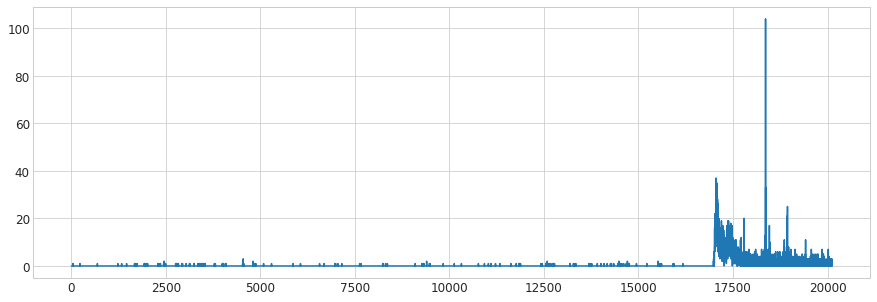

In [8]:
fig = plt.figure(figsize=(15,5))
df['col2'].plot()
plt.show()

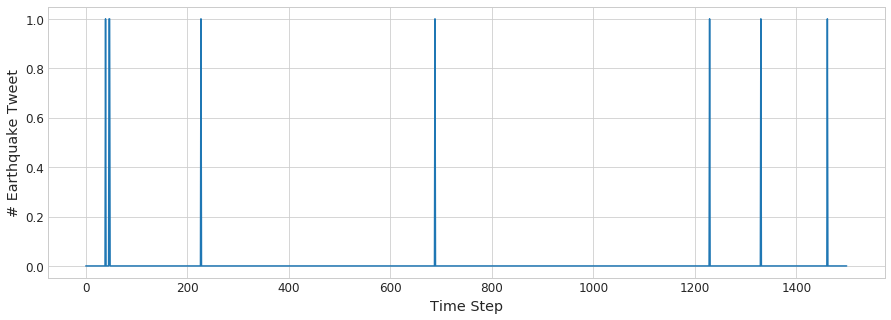

In [9]:
#tin hieu o trang thai khong co dong dat Without earthquake event situation
fig = plt.figure(figsize=(15,5))
df0 = df['col2'][0:1500]
plt.plot(df0)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("No earthquake")
pp.savefig(fig)
pp.close()

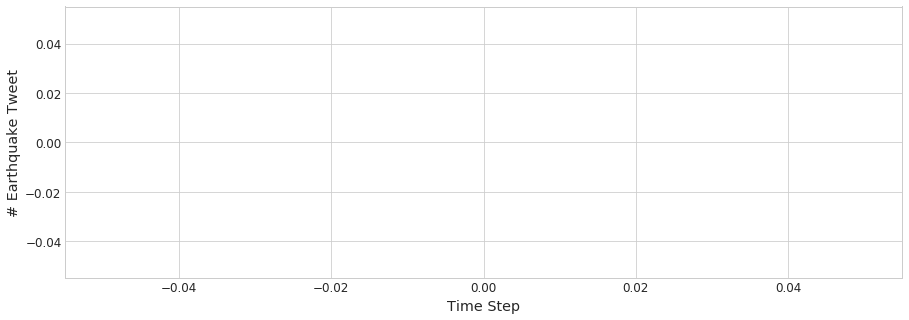

In [10]:
#isolate earthquake event [anomaly1]
fig1 = plt.figure(figsize=(15,5))
df1= df['col2'][28700:]
plt.plot(df1)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig1)
pp.close()

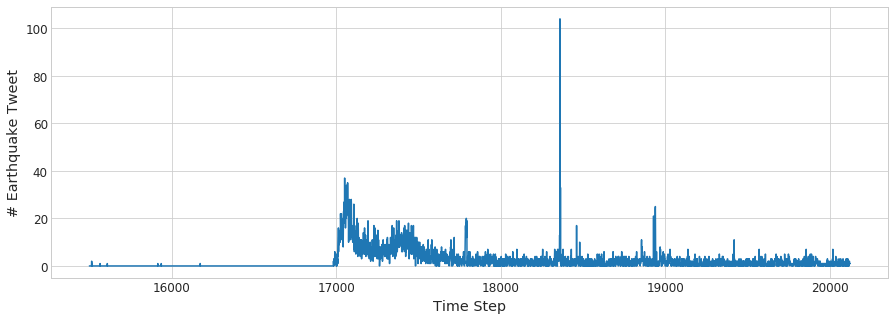

In [11]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df2= df['col2'][15500:]
plt.plot(df2)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig2)
pp.close()

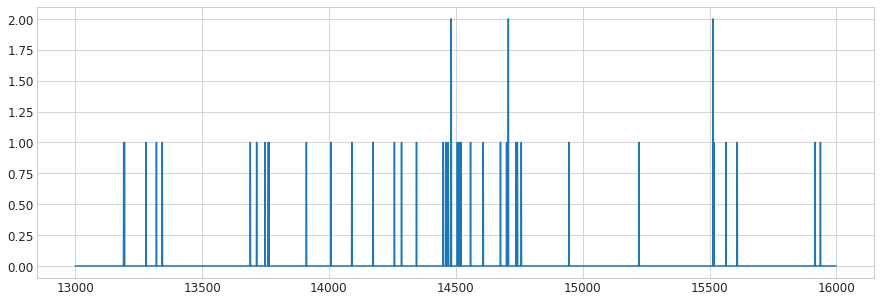

In [14]:
#isolate end sequence
fig3 = plt.figure(figsize=(15,5))
df3= df['col2'][13000:16000]
plt.plot(df3)
plt.show()

In [15]:
df['anomaly'] = 0
df.head(28750)

,col2,anomaly
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Size of test: 20127
Size of validation1: 4627
Size of validation2: 20127
Size of train: 15500
Total: 60381
Ratio of test: 0.333333
Ratio of validation1: 0.076630
Ratio of validation2: 0.333333
Ratio of train: 0.256703


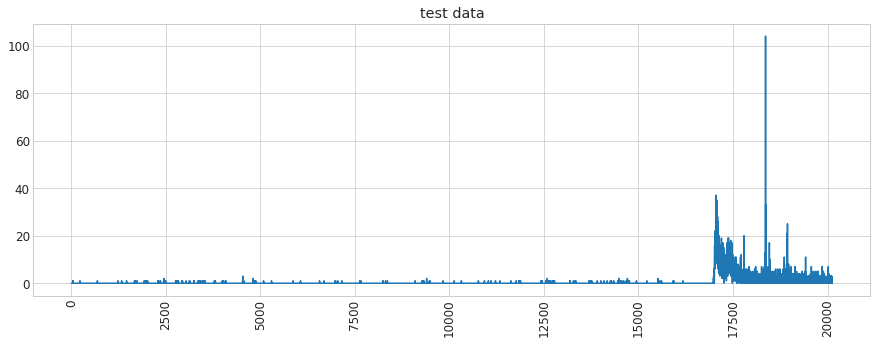

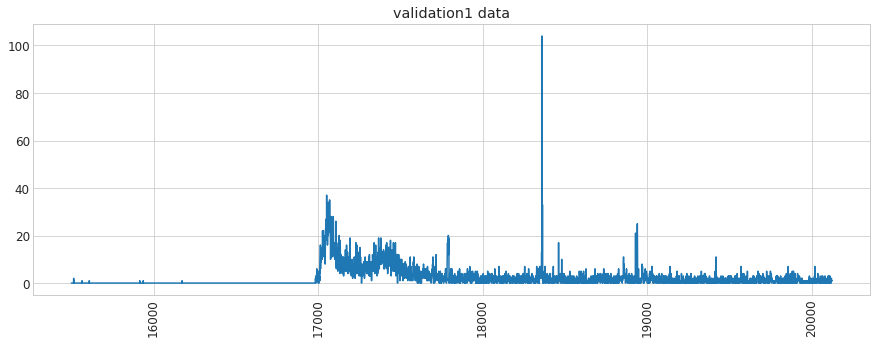

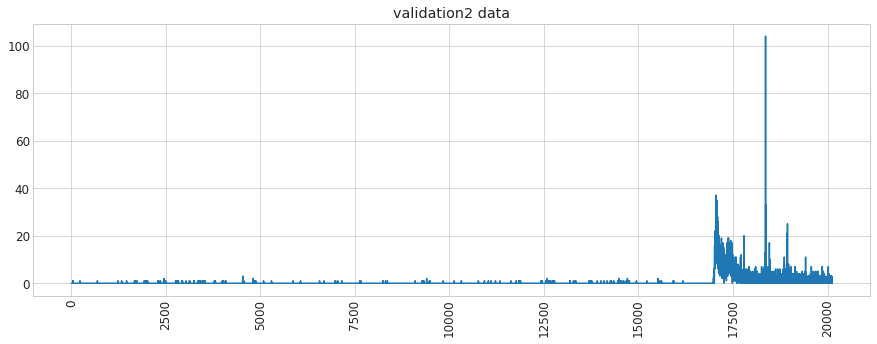

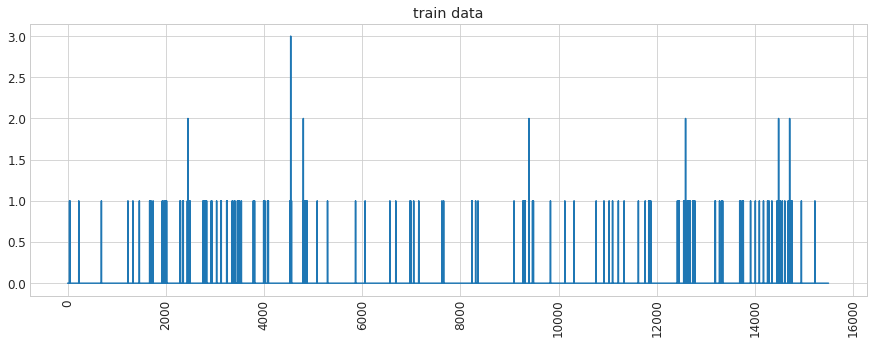

In [16]:
df_anomaly1 = df[15500:]
df_test = df

df_validation1= df[15500:]

df_not_train = df_anomaly1
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col2'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [18]:
for key in df_dict:
    np.save("../resources/data/earthquake/Earthquake4/%s"%(key),df_dict[key])

In [16]:
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here

In [20]:
data_folder = "../resources/data/earthquake/Earthquake4/"

In [21]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape

(15498, 1)
(15498,)


In [22]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)

(20125, 1)
(20125,)
(20125, 1, 1)
(20125, 1)


In [23]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(20125, 1)
(20125,)
(20125, 1)


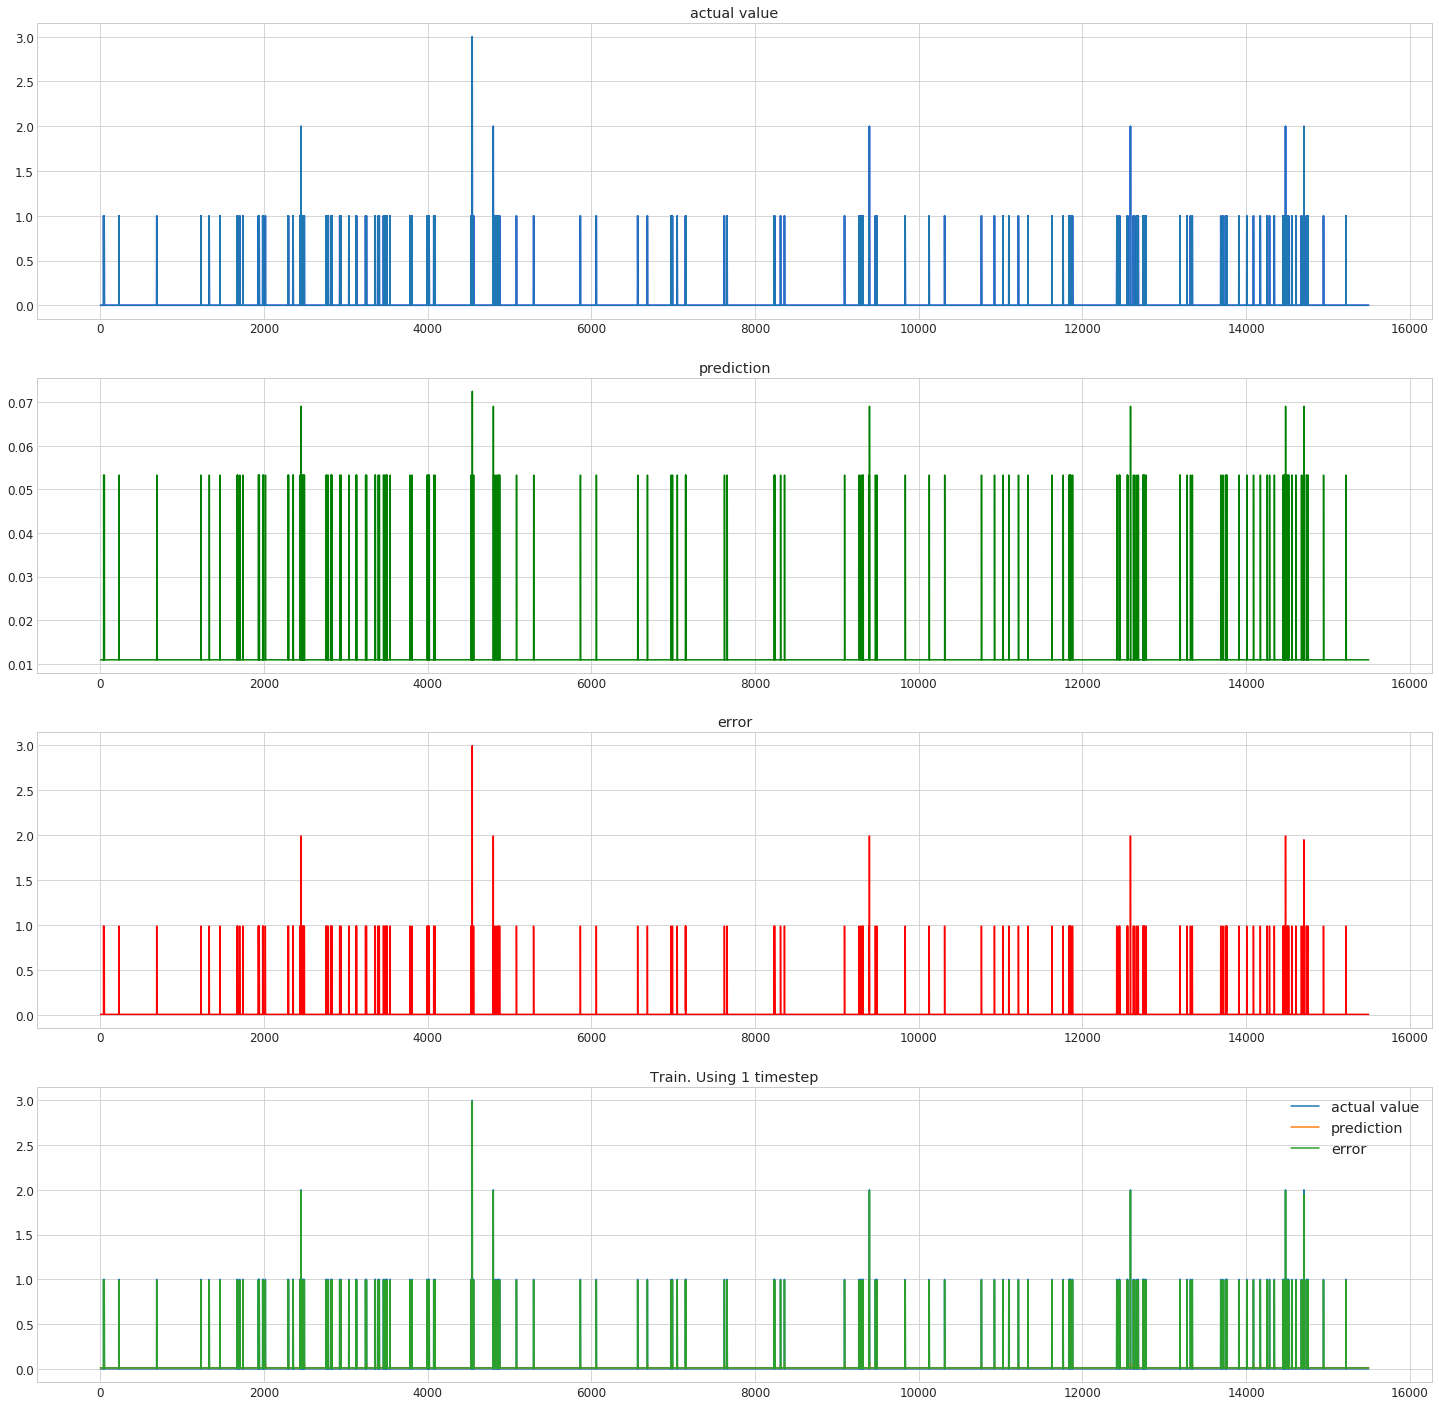

In [24]:
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(412)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(413)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(414)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.show()

0.022754961305286734
0.11026283876500402


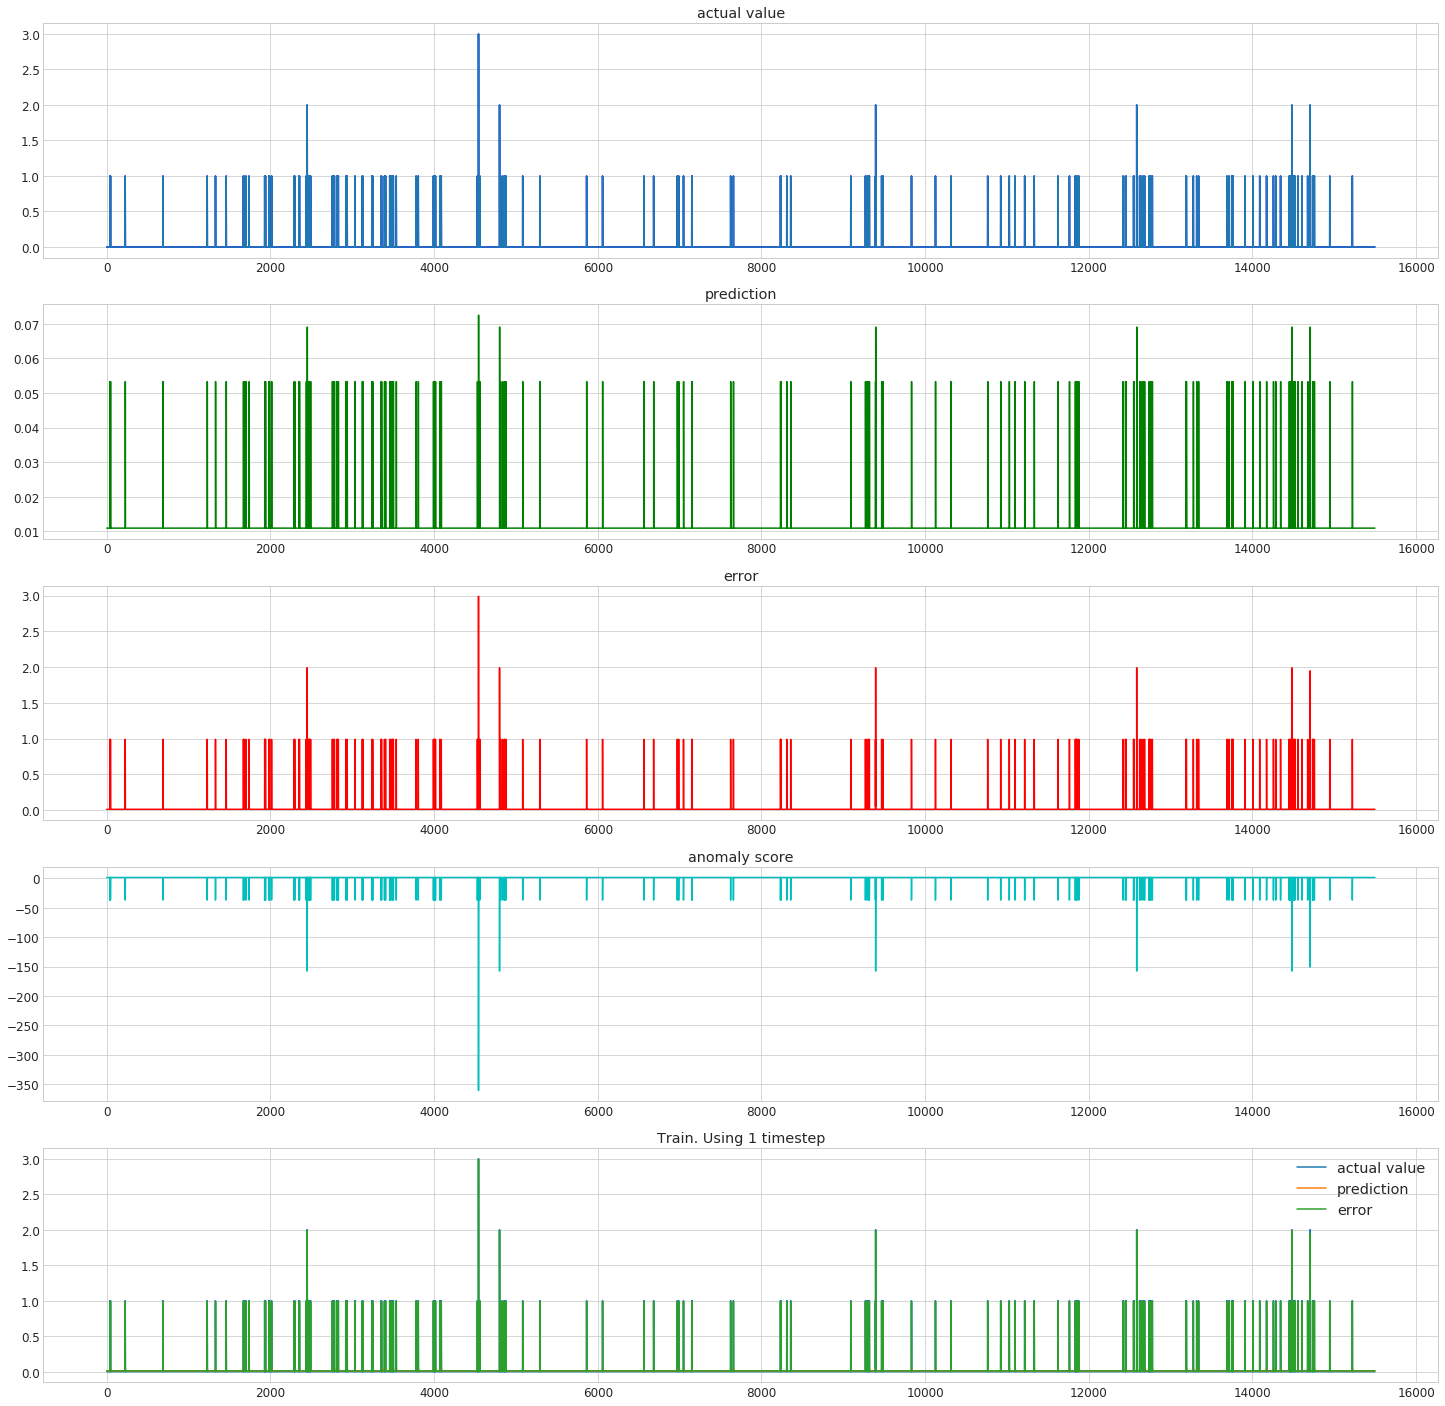

In [25]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  np.abs(train_true -train_predictions[:,i])

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(25,25))
plt.subplot(511)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(512)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(513)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(515)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.subplot(514)
plt.plot(p_values,'c-')
plt.title("anomaly score")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [26]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  np.abs(validation2_true -validation2_predictions[:,i])

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print v2_p_values.shape
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

(20125, 1)


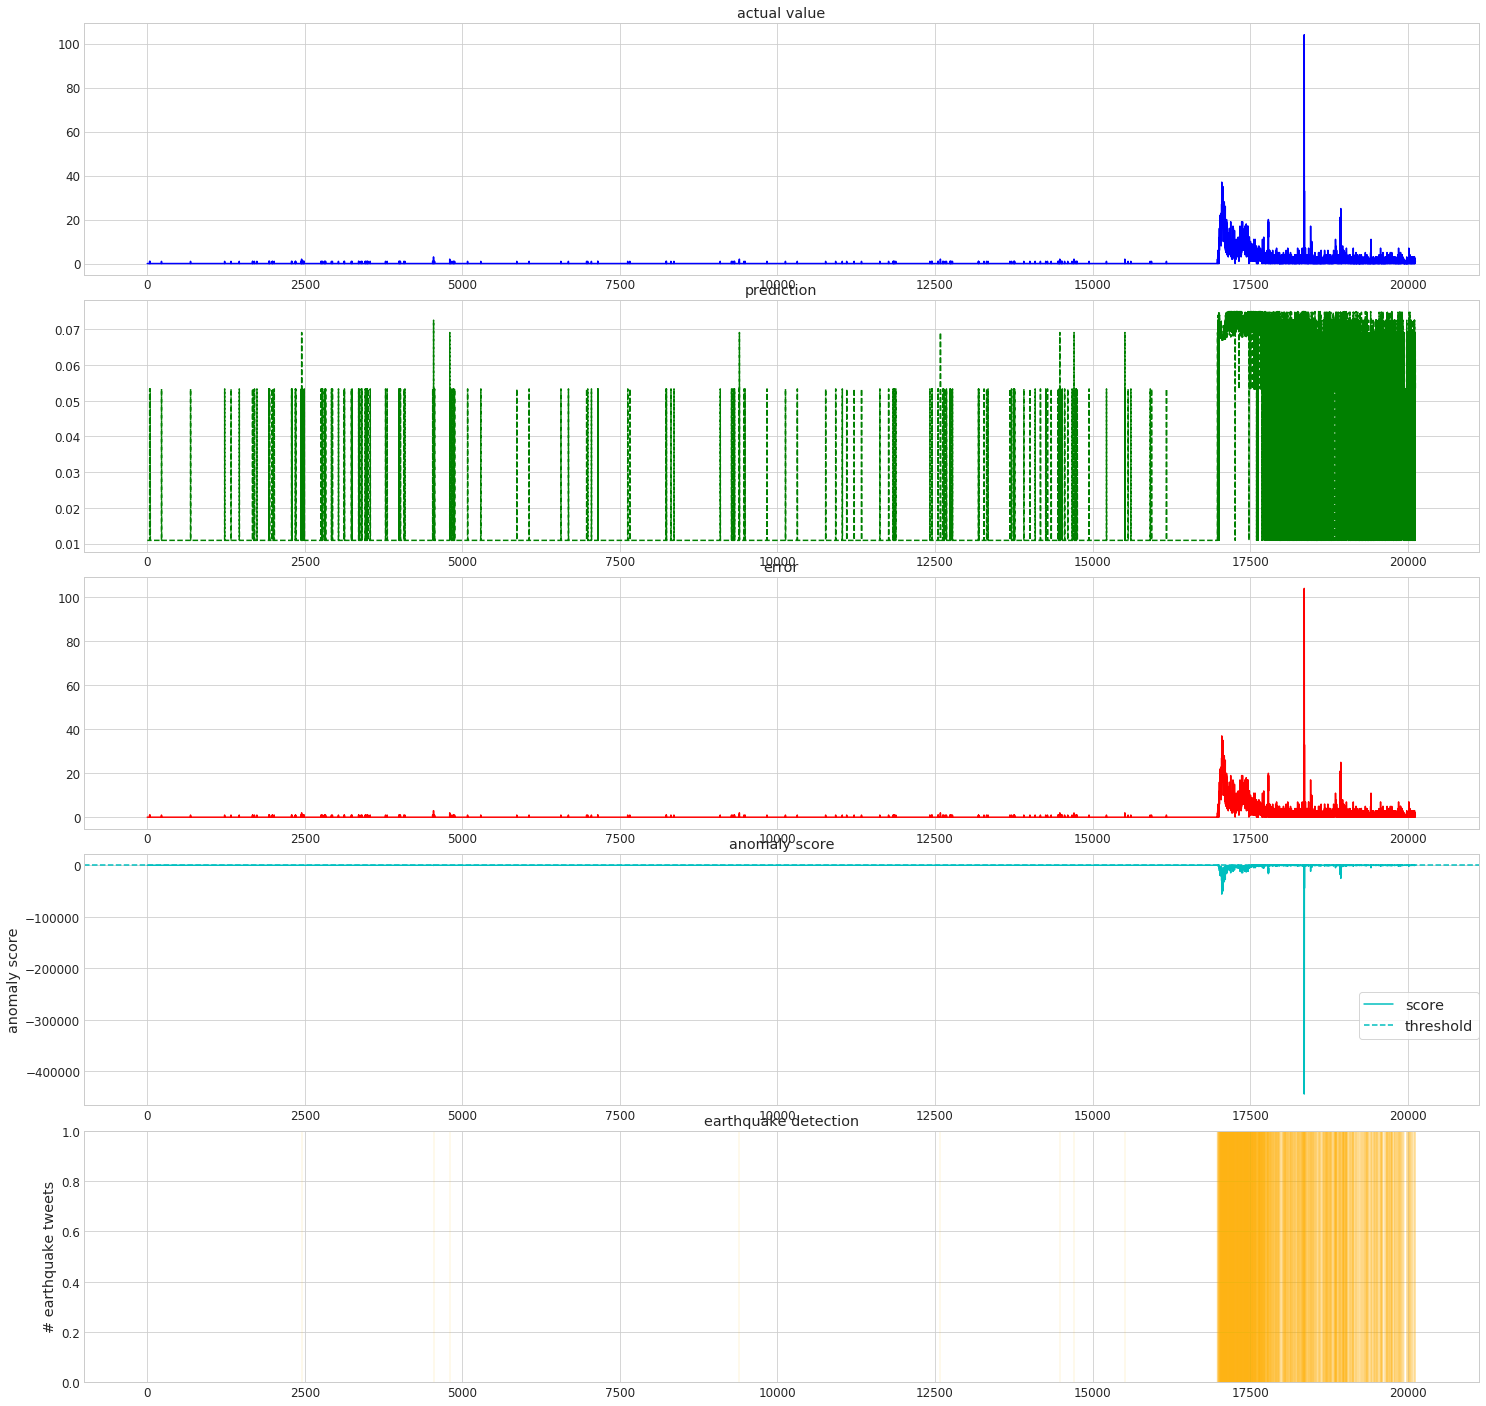

In [27]:
threshold_v2 = -100

f = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)

#print v2_below_threshold

ax1 = plt.subplot(511)
ax1.plot(validation2_true,label='actual value',color='b')
plt.title("actual value")

ax2 = plt.subplot(512,sharex=ax1)
ax2.plot(validation2_predictions[:,0],ls ='dashed',label='prediction',color='g')
plt.title("prediction")

ax3 = plt.subplot(513, sharex=ax1)
ax3.plot(abs(validation2_true - validation2_predictions[:,0]),label='error',color='r')
plt.title("error")

ax5 = plt.subplot(515, sharex=ax1)
for column in v2_below_threshold[0]:
    ax5.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)

plt.ylabel("# earthquake tweets")
plt.title("earthquake detection")


#plot v2 log PD
ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(v2_p_values,label='score',color='c')
ax4.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax4.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
plt.title("anomaly score")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
# xticklabels = ax1.get_xticklabels()
# plt.setp(xticklabels, visible=False)
# plt.xlabel("time")
plt.show()
pp = PdfPages('earthquake4 tweets_v2.pdf')
pp.savefig(f)
pp.close()

[ 2450  4543  4800  9396 12586 14481 14706 15513 16983 16986 16987 16988
 16989 16991 16992 16996 16998 17002 17003 17005 17008 17010 17011 17012
 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024
 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036
 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048
 17049 17050 17051 17052 17053 17054 17055 17056 17057 17058 17059 17060
 17061 17062 17063 17064 17065 17066 17067 17068 17069 17070 17071 17072
 17073 17074 17075 17076 17077 17078 17079 17080 17081 17082 17083 17084
 17085 17086 17087 17088]


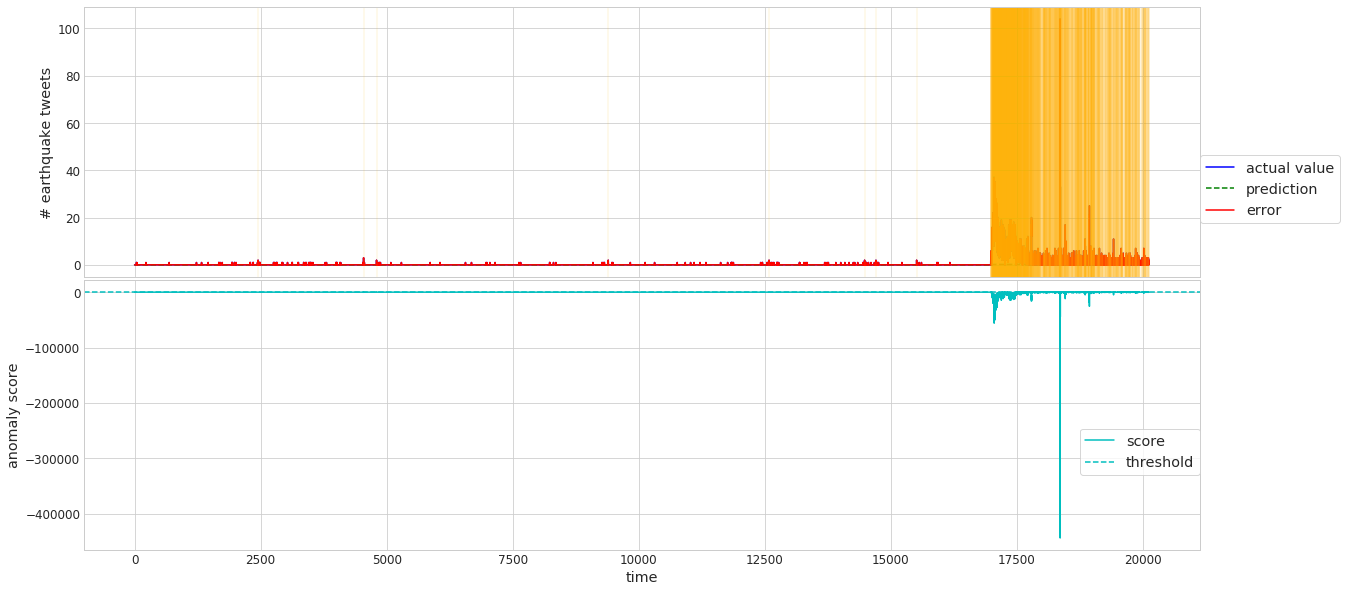

In [42]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
print test_below_threshold[0][0:100]
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='actual value',color='b')
ax1.plot(test_predictions[:,0],ls ='dashed',label='prediction',color='g')
ax1.plot(abs(test_true - test_predictions[:,0]),label='error',color='r')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("# earthquake tweets")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='score',color='c')
ax2.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("time")
plt.show()
pp = PdfPages('Earthquake_test.pdf')
pp.savefig(f)
pp.close()

In [29]:
df = pd.read_csv("../resources/data/earthquake/Earthquake4/"+ input_data,header=None,names=['col0','col1','col2'],sep=",")

In [30]:
df['col1'][16983]

'12/28/2016 08:18:52'

In [ ]:
# FINISH NOTEBOOK